In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# Read the CSV file
df = pd.read_csv('blockbusters.csv')

# View the first few rows of the DataFrame
df

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975


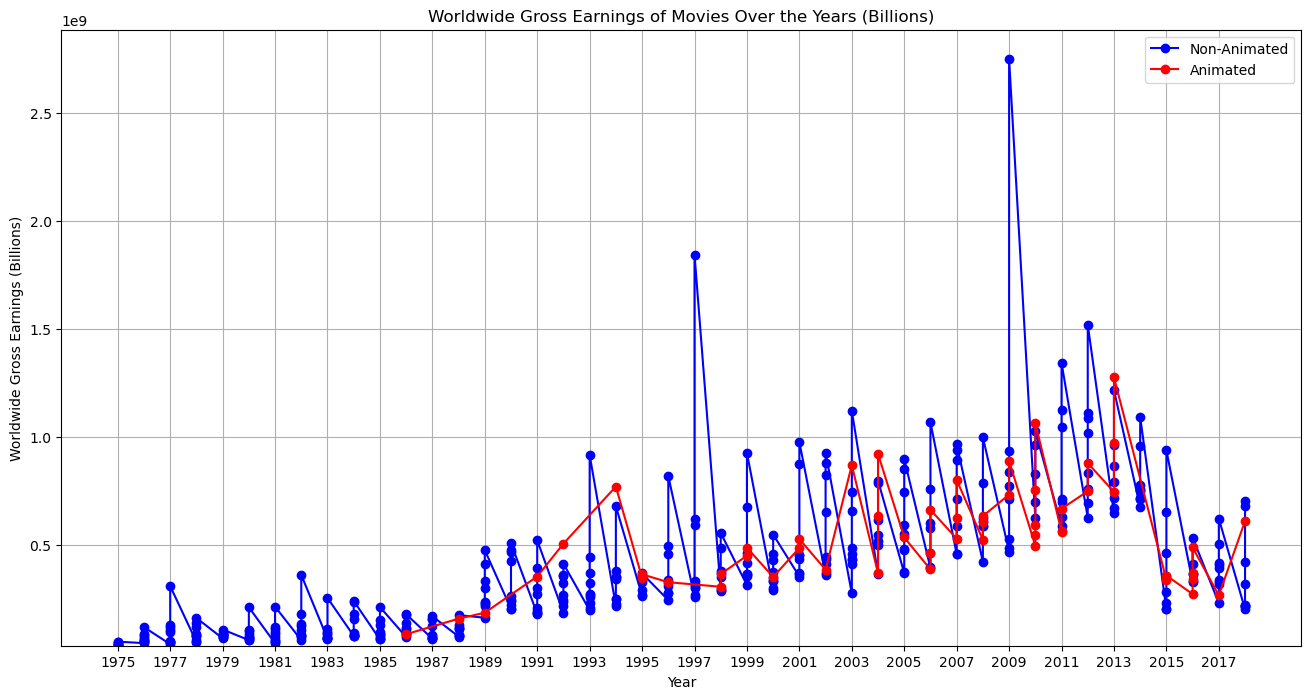

In [2]:
# Filter data for movies that do not have "Animation" in any column
non_animated_df = df[~((df['Main_Genre'] == 'Animation') | (df['Genre_2'] == 'Animation') | (df['Genre_3'] == 'Animation'))].copy()

# Remove dollar sign and commas from 'worldwide_gross' column and convert to float
non_animated_df['worldwide_gross'] = non_animated_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Check if the filtered DataFrame is not empty
if not non_animated_df.empty:
    # Filter data for animated movies
    animated_df = df[(df['Main_Genre'] == 'Animation') | (df['Genre_2'] == 'Animation') | (df['Genre_3'] == 'Animation')].copy()

    # Remove dollar sign and commas from 'worldwide_gross' column and convert to float
    animated_df['worldwide_gross'] = animated_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

    # Set figure size
    plt.figure(figsize=(16, 8))  # Wider figure size

    # Plotting for non-animated movies
    plt.plot(non_animated_df['year'], non_animated_df['worldwide_gross'], marker='o', linestyle='-', color='blue', label='Non-Animated')

    # Plotting for animated movies
    plt.plot(animated_df['year'], animated_df['worldwide_gross'], marker='o', linestyle='-', color='red', label='Animated')

    plt.xlabel('Year')
    plt.ylabel('Worldwide Gross Earnings (Billions)')
    plt.title('Worldwide Gross Earnings of Movies Over the Years (Billions)')
    plt.grid(True)  # Add grid lines for better readability
    plt.legend()  # Show legend

    # Set y-axis limits starting from slightly below zero
    plt.ylim(bottom=min(non_animated_df['worldwide_gross'].min(), animated_df['worldwide_gross'].min()) * 0.9)

    # Show every 2.5 years on the x-axis
    plt.xticks(range(min(min(non_animated_df['year']), min(animated_df['year'])), max(max(non_animated_df['year']), max(animated_df['year'])) + 1, 2))

    plt.show()
else:
    print("No non-animated movies found.")

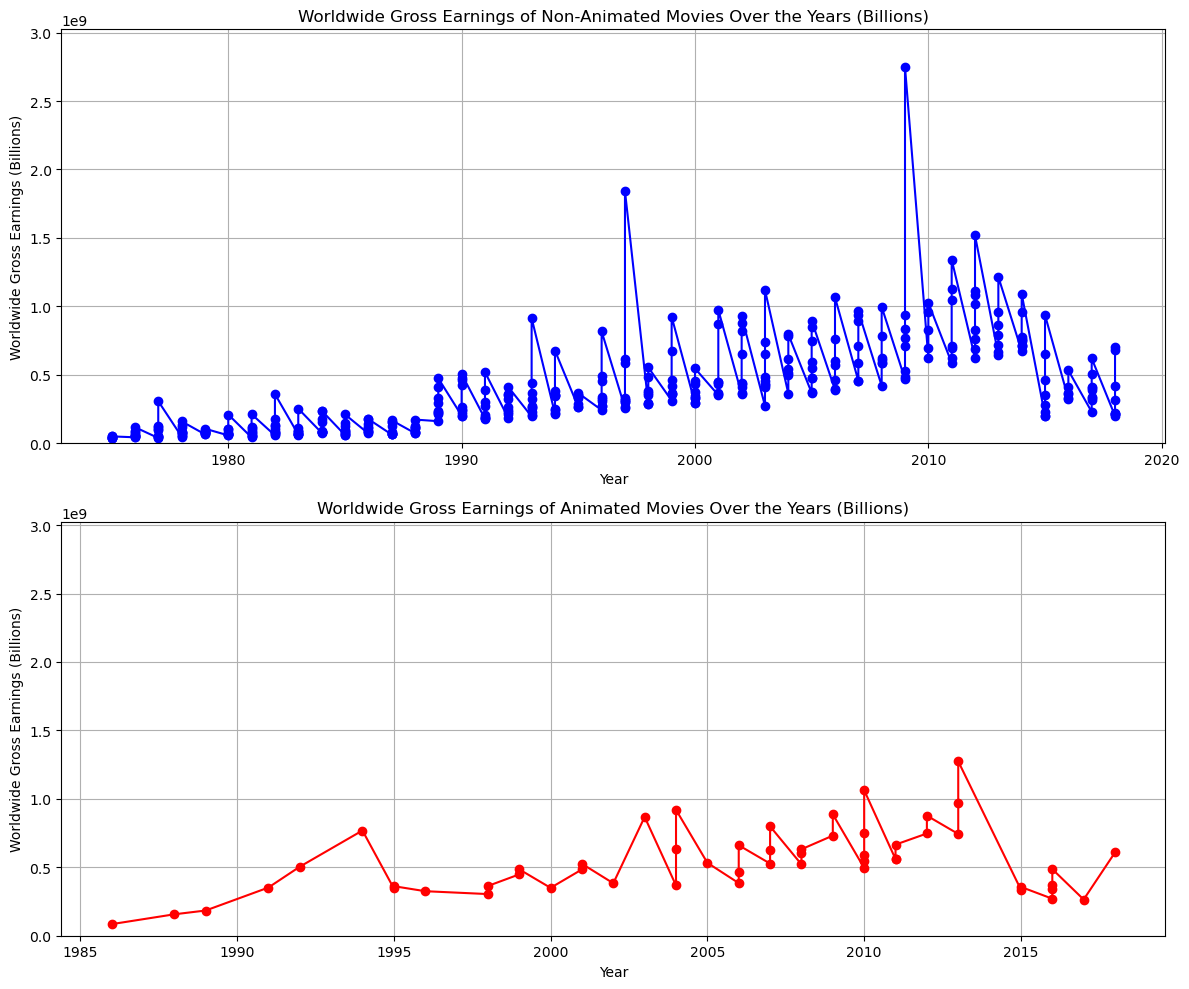

In [3]:

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Filter data for movies that do not have "Animation" in any column
non_animated_df = df[~((df['Main_Genre'] == 'Animation') | (df['Genre_2'] == 'Animation') | (df['Genre_3'] == 'Animation'))].copy()

# Remove dollar sign and commas from 'worldwide_gross' column and convert to float
non_animated_df['worldwide_gross'] = non_animated_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Plotting for non-animated movies
if not non_animated_df.empty:
    max_gross_non_animated = non_animated_df['worldwide_gross'].max()
    ax1.plot(non_animated_df['year'], non_animated_df['worldwide_gross'], marker='o', linestyle='-', color='blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Worldwide Gross Earnings (Billions)')
    ax1.set_title('Worldwide Gross Earnings of Non-Animated Movies Over the Years (Billions)')
    ax1.grid(True)  # Add grid lines for better readability
    ax1.set_ylim(0, max_gross_non_animated * 1.1)  # Set y-axis limit for non-animated movies
else:
    ax1.text(0.5, 0.5, 'No non-animated movies found', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

# Filter data for animated movies
animated_df = df[(df['Main_Genre'] == 'Animation') | (df['Genre_2'] == 'Animation') | (df['Genre_3'] == 'Animation')].copy()

# Remove dollar sign and commas from 'worldwide_gross' column and convert to float
animated_df['worldwide_gross'] = animated_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Plotting for animated movies
if not animated_df.empty:
    max_gross_animated = animated_df['worldwide_gross'].max()
    ax2.plot(animated_df['year'], animated_df['worldwide_gross'], marker='o', linestyle='-', color='red')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Worldwide Gross Earnings (Billions)')
    ax2.set_title('Worldwide Gross Earnings of Animated Movies Over the Years (Billions)')
    ax2.grid(True)  # Add grid lines for better readability
    ax2.set_ylim(0, max(max_gross_animated, max_gross_non_animated) * 1.1)  # Set y-axis limit for animated movies
else:
    ax2.text(0.5, 0.5, 'No animated movies found', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

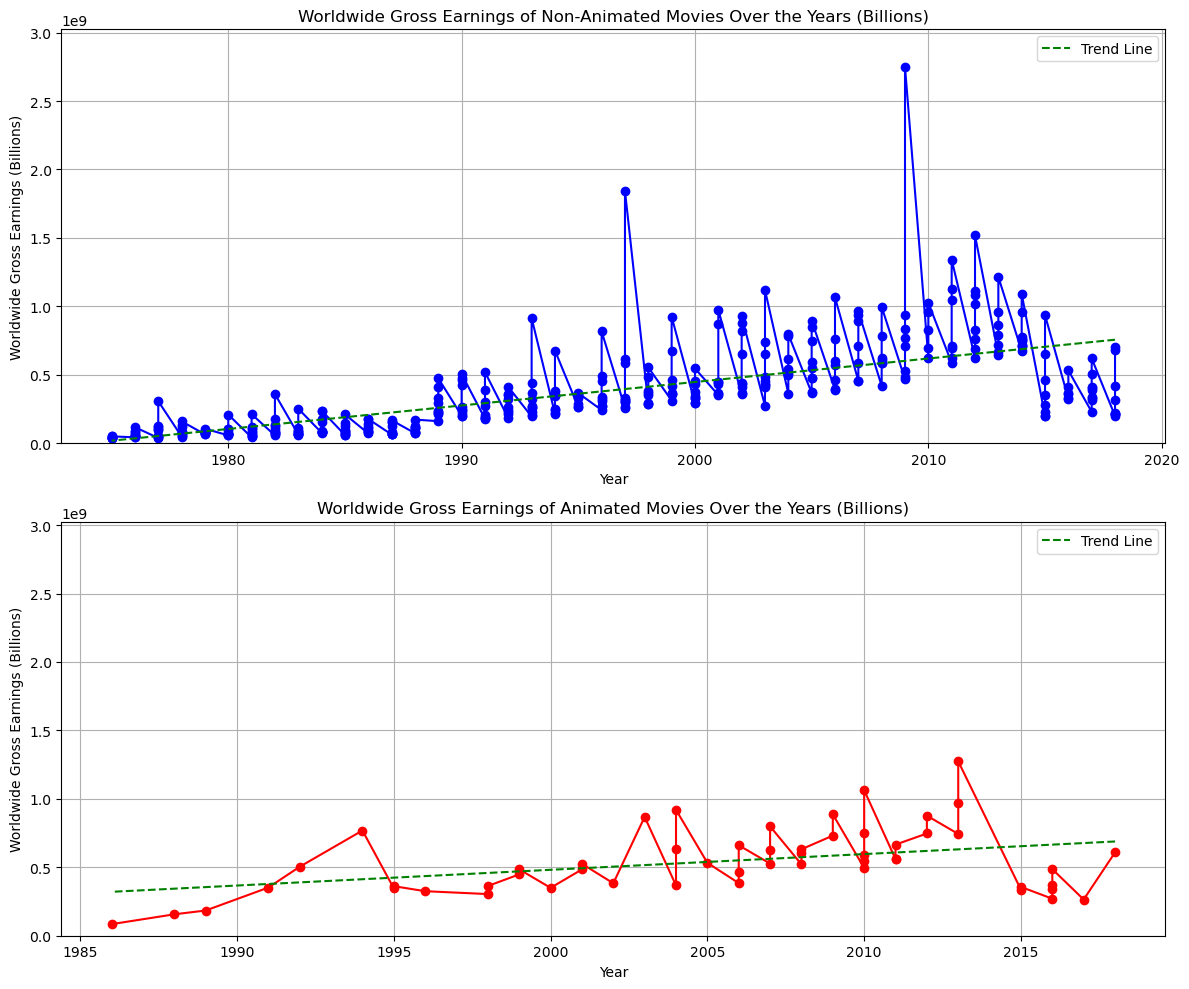

In [4]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Filter data for movies that do not have "Animation" in any column
non_animated_df = df[~((df['Main_Genre'] == 'Animation') | (df['Genre_2'] == 'Animation') | (df['Genre_3'] == 'Animation'))].copy()

# Remove dollar sign and commas from 'worldwide_gross' column and convert to float
non_animated_df['worldwide_gross'] = non_animated_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Plotting for non-animated movies
if not non_animated_df.empty:
    max_gross_non_animated = non_animated_df['worldwide_gross'].max()
    ax1.plot(non_animated_df['year'], non_animated_df['worldwide_gross'], marker='o', linestyle='-', color='blue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Worldwide Gross Earnings (Billions)')
    ax1.set_title('Worldwide Gross Earnings of Non-Animated Movies Over the Years (Billions)')
    ax1.grid(True)  # Add grid lines for better readability
    ax1.set_ylim(0, max_gross_non_animated * 1.1)  # Set y-axis limit for non-animated movies
    
    # Add trend line
    z = np.polyfit(non_animated_df['year'], non_animated_df['worldwide_gross'], 1)
    p = np.poly1d(z)
    ax1.plot(non_animated_df['year'], p(non_animated_df['year']), color='green', linestyle='--', label='Trend Line')
    ax1.legend()  # Show legend
else:
    ax1.text(0.5, 0.5, 'No non-animated movies found', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

# Filter data for animated movies
animated_df = df[(df['Main_Genre'] == 'Animation') | (df['Genre_2'] == 'Animation') | (df['Genre_3'] == 'Animation')].copy()

# Remove dollar sign and commas from 'worldwide_gross' column and convert to float
animated_df['worldwide_gross'] = animated_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Plotting for animated movies
if not animated_df.empty:
    max_gross_animated = animated_df['worldwide_gross'].max()
    ax2.plot(animated_df['year'], animated_df['worldwide_gross'], marker='o', linestyle='-', color='red')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Worldwide Gross Earnings (Billions)')
    ax2.set_title('Worldwide Gross Earnings of Animated Movies Over the Years (Billions)')
    ax2.grid(True)  # Add grid lines for better readability
    ax2.set_ylim(0, max(max_gross_animated, max_gross_non_animated) * 1.1)  # Set y-axis limit for animated movies
    
    # Add trend line
    z = np.polyfit(animated_df['year'], animated_df['worldwide_gross'], 1)
    p = np.poly1d(z)
    ax2.plot(animated_df['year'], p(animated_df['year']), color='green', linestyle='--', label='Trend Line')
    ax2.legend()  # Show legend
else:
    ax2.text(0.5, 0.5, 'No animated movies found', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

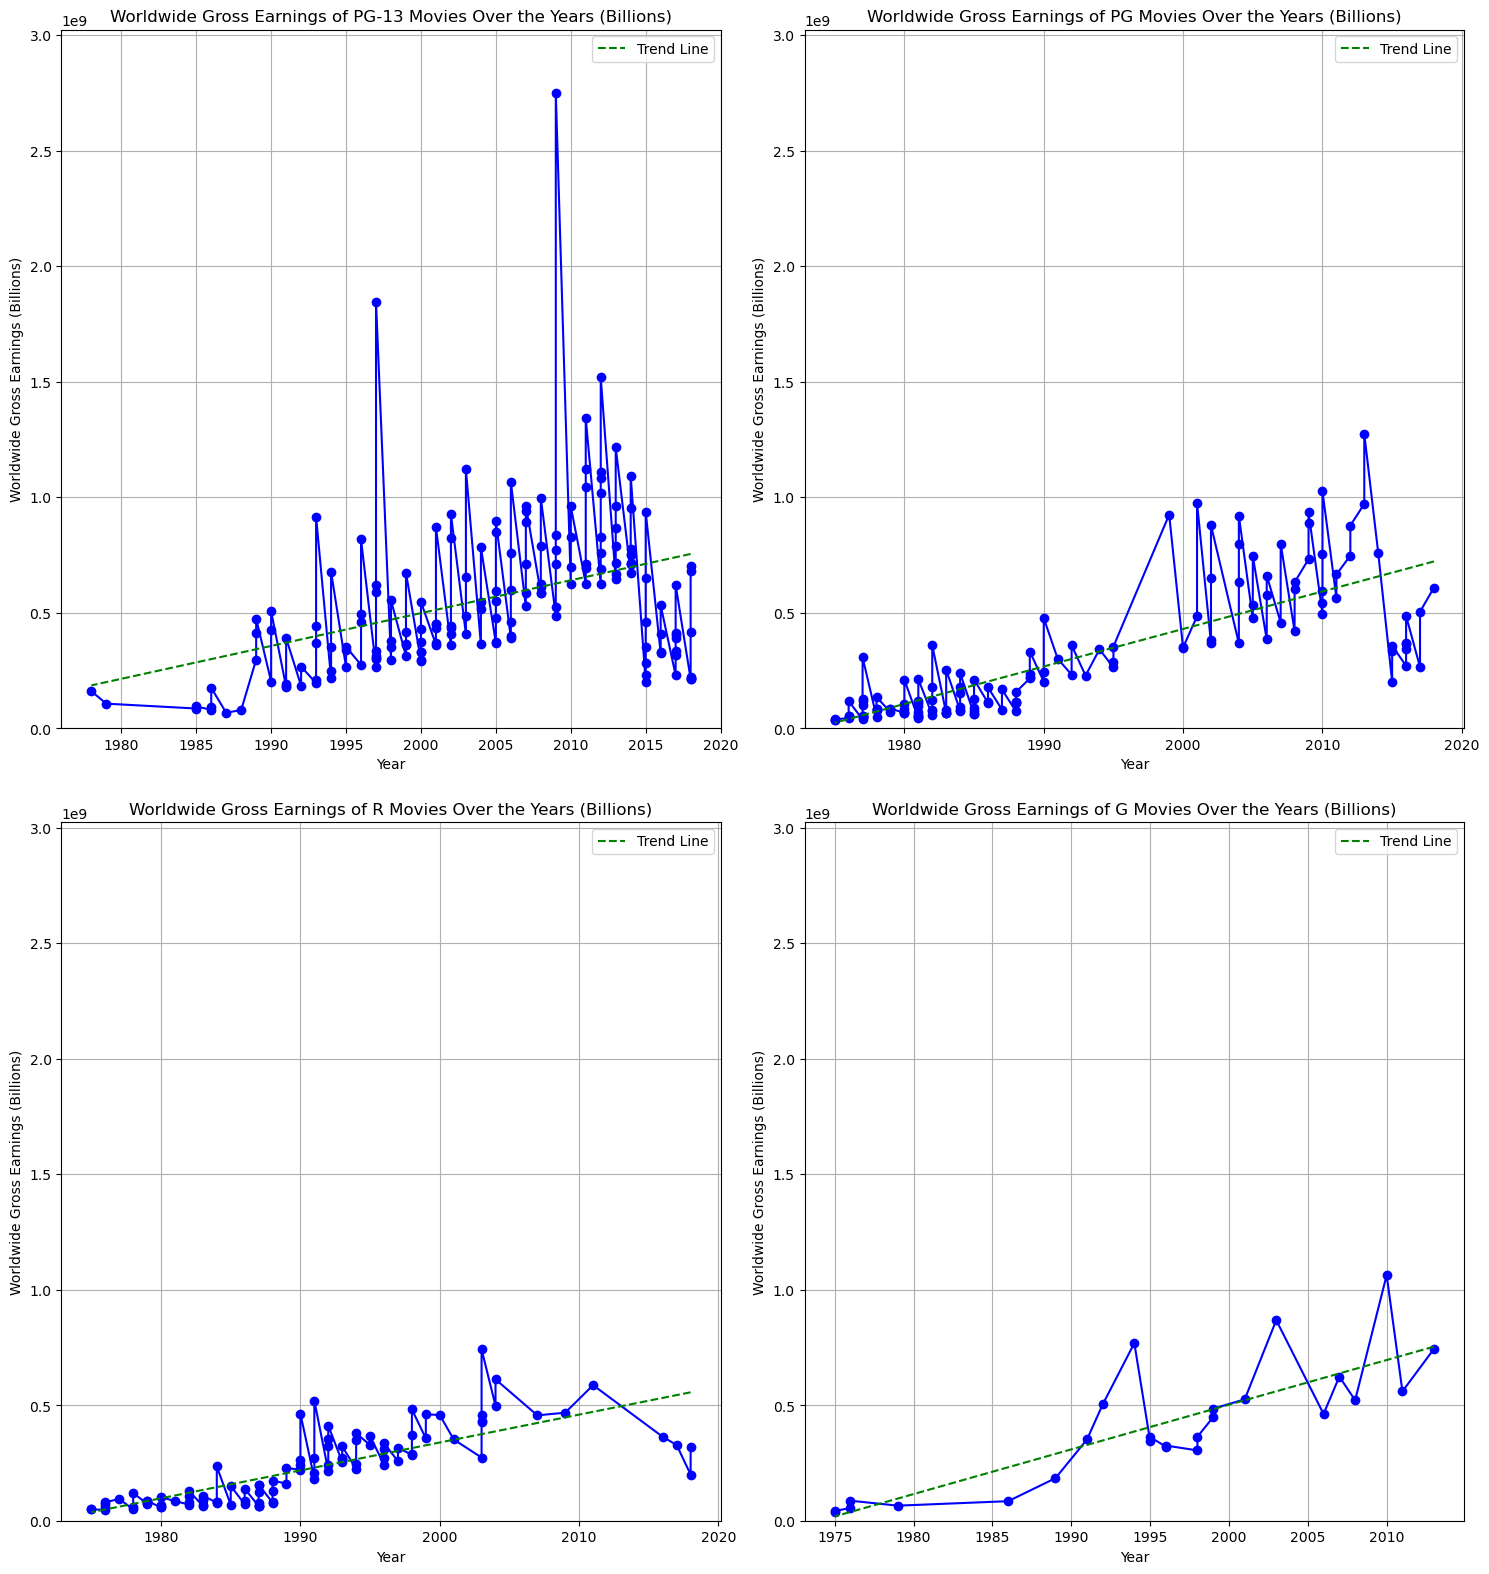

In [5]:
# Get unique rating categories
rating_categories = df['rating'].unique()

# Initialize variable to hold the maximum gross earnings
max_gross = 0

# Iterate over each rating category
for rating in rating_categories:
    # Filter data for the current rating category
    rating_df = df[df['rating'] == rating].copy()
    
    # Remove dollar sign and commas from 'worldwide_gross' column and convert to float
    rating_df['worldwide_gross'] = rating_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    
    # Calculate the maximum gross earnings for the current rating category
    max_gross_rating = rating_df['worldwide_gross'].max()
    
    # Update the overall maximum gross earnings if the current rating category has a higher maximum
    if max_gross_rating > max_gross:
        max_gross = max_gross_rating

# Define the number of columns for the grid layout
num_cols = 2

# Calculate the number of rows required based on the number of rating categories and number of columns
num_rows = (len(rating_categories) + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8 * num_rows))

for i, rating in enumerate(rating_categories):
    # Filter data for the current rating category
    rating_df = df[df['rating'] == rating].copy()
    
    # Remove dollar sign and commas from 'worldwide_gross' column and convert to float
    rating_df['worldwide_gross'] = rating_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    
    # Plotting
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    if not rating_df.empty:
        ax.plot(rating_df['year'], rating_df['worldwide_gross'], marker='o', linestyle='-', color='blue')
        ax.set_xlabel('Year')
        ax.set_ylabel('Worldwide Gross Earnings (Billions)')
        ax.set_title(f'Worldwide Gross Earnings of {rating} Movies Over the Years (Billions)')
        ax.grid(True)  # Add grid lines for better readability
        ax.set_ylim(0, max_gross * 1.1)  # Set y-axis limit for rating category
        
        # Add trend line
        z = np.polyfit(rating_df['year'], rating_df['worldwide_gross'], 1)
        p = np.poly1d(z)
        ax.plot(rating_df['year'], p(rating_df['year']), color='green', linestyle='--', label='Trend Line')
        ax.legend()  # Show legend
    else:
        ax.text(0.5, 0.5, f'No {rating} movies found', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

C:\Users\amid1\AppData\Local\Temp\ipykernel_27092\3050945741.py:51: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(studio_df['year'], studio_df['worldwide_gross'], 1)
C:\Users\amid1\AppData\Local\Temp\ipykernel_27092\3050945741.py:51: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(studio_df['year'], studio_df['worldwide_gross'], 1)
C:\Users\amid1\AppData\Local\Temp\ipykernel_27092\3050945741.py:51: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(studio_df['year'], studio_df['worldwide_gross'], 1)
C:\Users\amid1\AppData\Local\Temp\ipykernel_27092\3050945741.py:51: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(studio_df['year'], studio_df['worldwide_gross'], 1)
C:\Users\amid1\AppData\Local\Temp\ipykernel_27092\3050945741.py:51: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(studio_df['year'], studio_df['worldwide_gross'], 1)


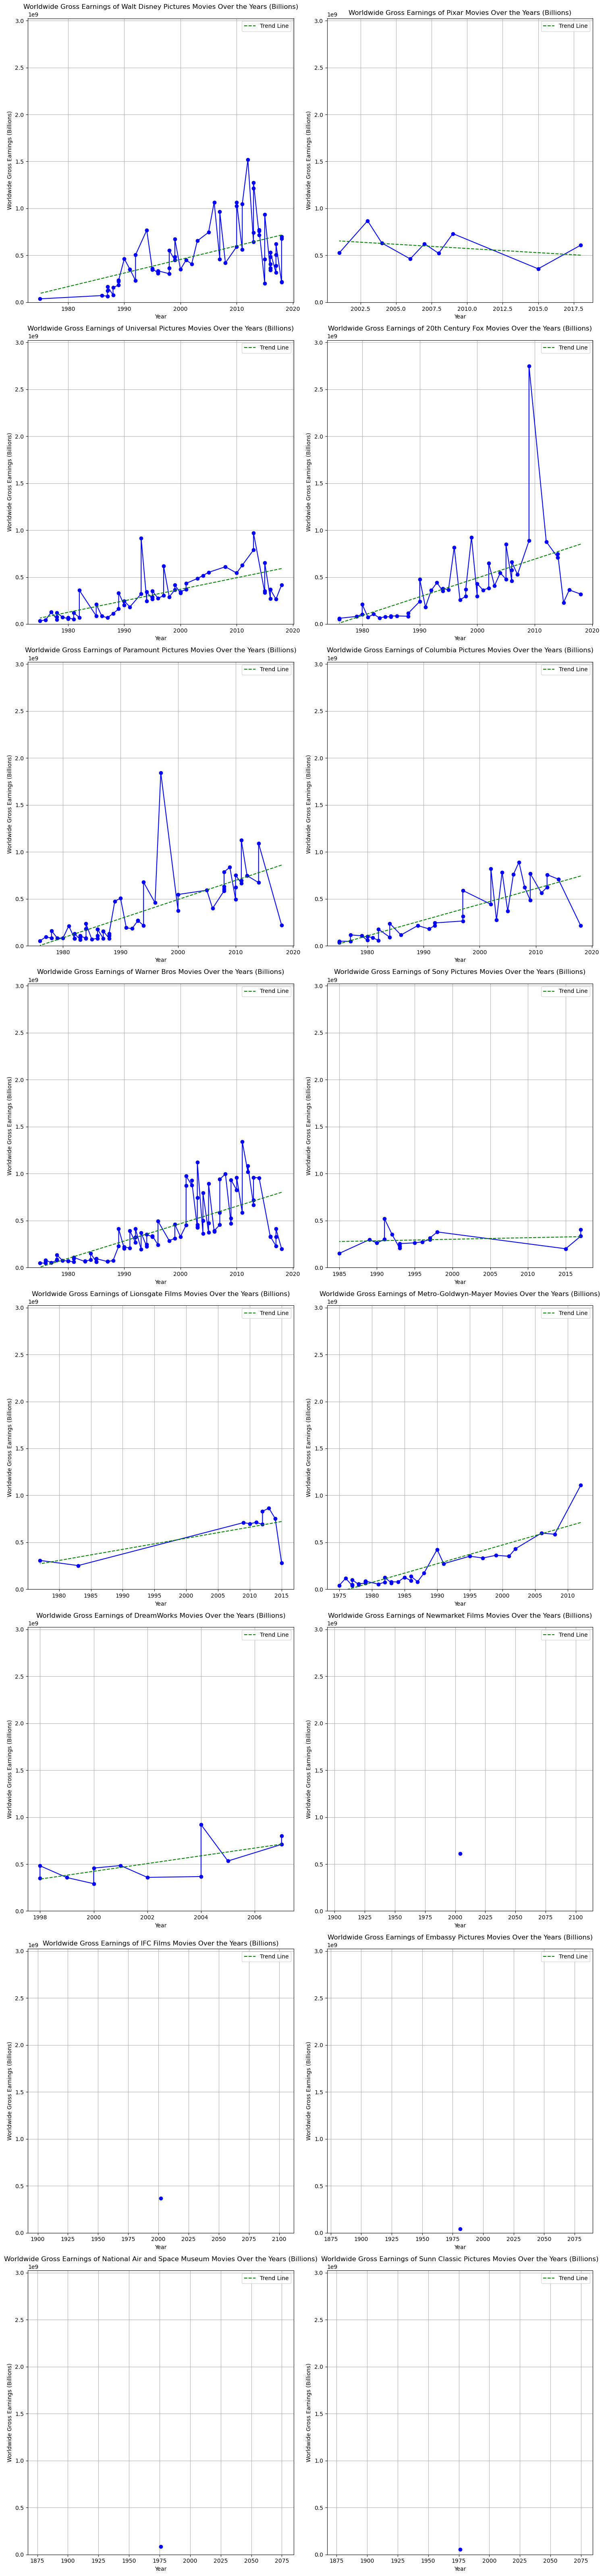

In [6]:
# Get unique studio categories
studio_categories = df['studio'].unique()

# Initialize variable to hold the maximum gross earnings
max_gross = 0

# Iterate over each studio category
for studio in studio_categories:
    # Filter data for the current studio category
    studio_df = df[df['studio'] == studio].copy()
    
    # Remove dollar sign and commas from 'worldwide_gross' column and convert to float
    studio_df['worldwide_gross'] = studio_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    
    # Calculate the maximum gross earnings for the current studio category
    max_gross_studio = studio_df['worldwide_gross'].max()
    
    # Update the overall maximum gross earnings if the current studio category has a higher maximum
    if max_gross_studio > max_gross:
        max_gross = max_gross_studio

# Define the number of columns for the grid layout
num_cols = 2

# Calculate the number of rows required based on the number of studio categories and number of columns
num_rows = (len(studio_categories) + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8 * num_rows))

for i, studio in enumerate(studio_categories):
    # Filter data for the current studio category
    studio_df = df[df['studio'] == studio].copy()
    
    # Remove dollar sign and commas from 'worldwide_gross' column and convert to float
    studio_df['worldwide_gross'] = studio_df['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    
    # Plotting
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]
    if not studio_df.empty:
        ax.plot(studio_df['year'], studio_df['worldwide_gross'], marker='o', linestyle='-', color='blue')
        ax.set_xlabel('Year')
        ax.set_ylabel('Worldwide Gross Earnings (Billions)')
        ax.set_title(f'Worldwide Gross Earnings of {studio} Movies Over the Years (Billions)')
        ax.grid(True)  # Add grid lines for better readability
        ax.set_ylim(0, max_gross * 1.1)  # Set y-axis limit for studio category
        
        # Add trend line
        z = np.polyfit(studio_df['year'], studio_df['worldwide_gross'], 1)
        p = np.poly1d(z)
        ax.plot(studio_df['year'], p(studio_df['year']), color='green', linestyle='--', label='Trend Line')
        ax.legend()  # Show legend
    else:
        ax.text(0.5, 0.5, f'No {studio} movies found', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


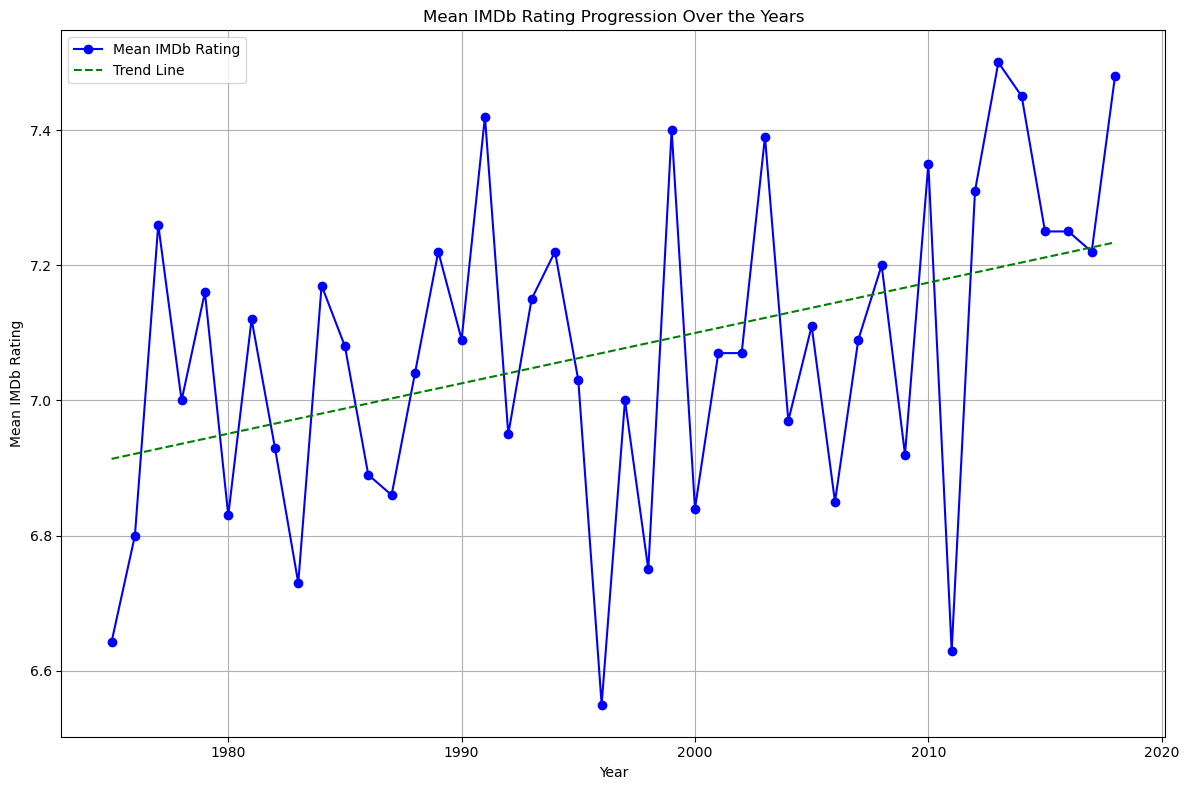

In [7]:
# Group by year and calculate the mean IMDb rating for each year
year_imdb_mean = df.groupby('year')['imdb_rating'].mean()

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plot IMDb ratings over the years
plt.plot(year_imdb_mean.index, year_imdb_mean.values, marker='o', linestyle='-', color='blue', label='Mean IMDb Rating')

# Add trend line
z = np.polyfit(year_imdb_mean.index, year_imdb_mean.values, 1)
p = np.poly1d(z)
plt.plot(year_imdb_mean.index, p(year_imdb_mean.index), color='green', linestyle='--', label='Trend Line')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Mean IMDb Rating')
plt.title('Mean IMDb Rating Progression Over the Years')
plt.legend()

# Add grid lines for better readability
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

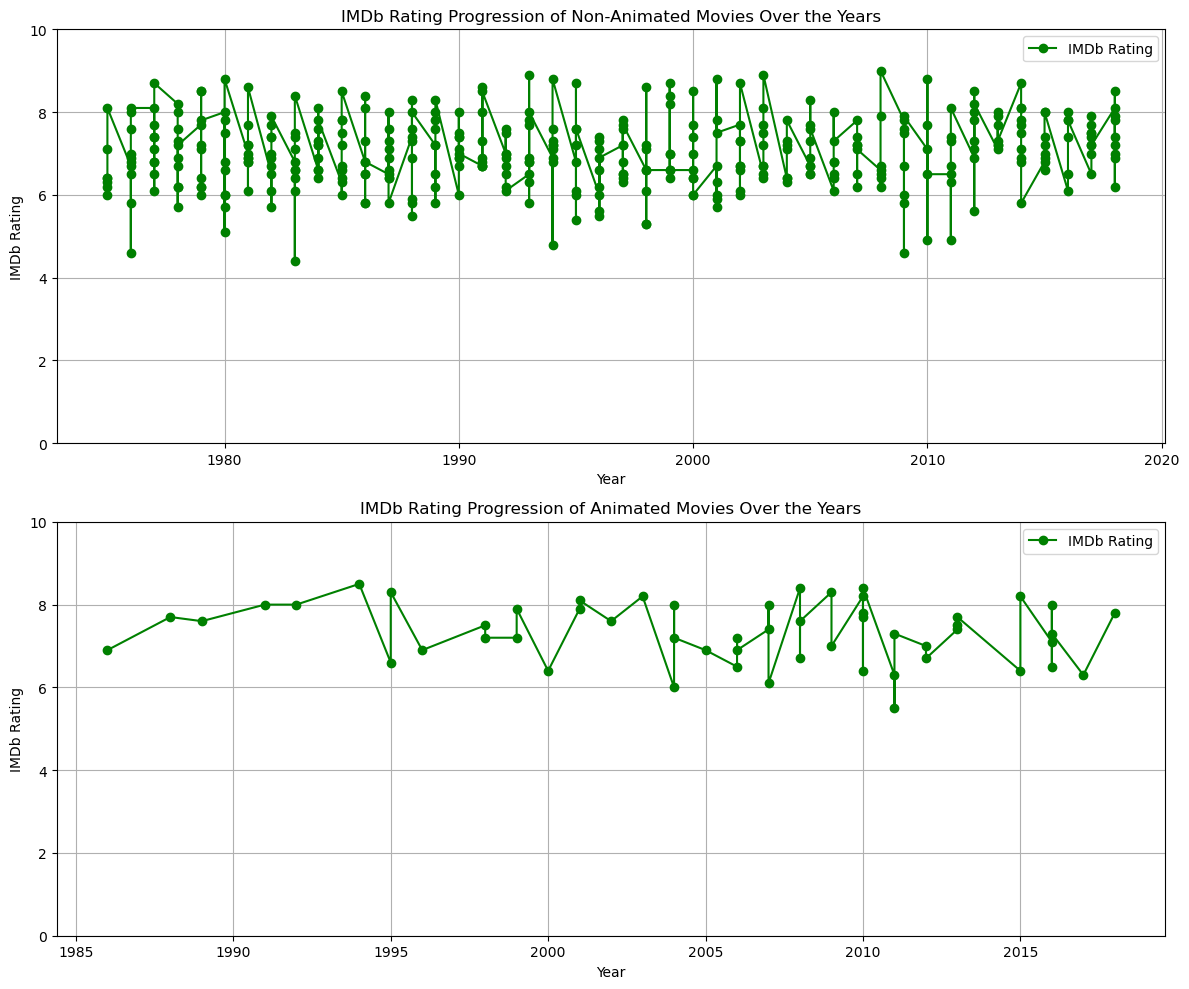

In [8]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot IMDb rating progression for non-animated movies
if not non_animated_df.empty:
    ax1.plot(non_animated_df['year'], non_animated_df['imdb_rating'], marker='o', linestyle='-', color='green', label='IMDb Rating')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('IMDb Rating')
    ax1.set_title('IMDb Rating Progression of Non-Animated Movies Over the Years')
    ax1.grid(True)  # Add grid lines for better readability
    ax1.set_ylim(0, 10)  # Set y-axis limit for IMDb rating
    ax1.legend()  # Show legend
else:
    ax1.text(0.5, 0.5, 'No non-animated movies found', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

# Plot IMDb rating progression for animated movies
if not animated_df.empty:
    ax2.plot(animated_df['year'], animated_df['imdb_rating'], marker='o', linestyle='-', color='green', label='IMDb Rating')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('IMDb Rating')
    ax2.set_title('IMDb Rating Progression of Animated Movies Over the Years')
    ax2.grid(True)  # Add grid lines for better readability
    ax2.set_ylim(0, 10)  # Set y-axis limit for IMDb rating
    ax2.legend()  # Show legend
else:
    ax2.text(0.5, 0.5, 'No animated movies found', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

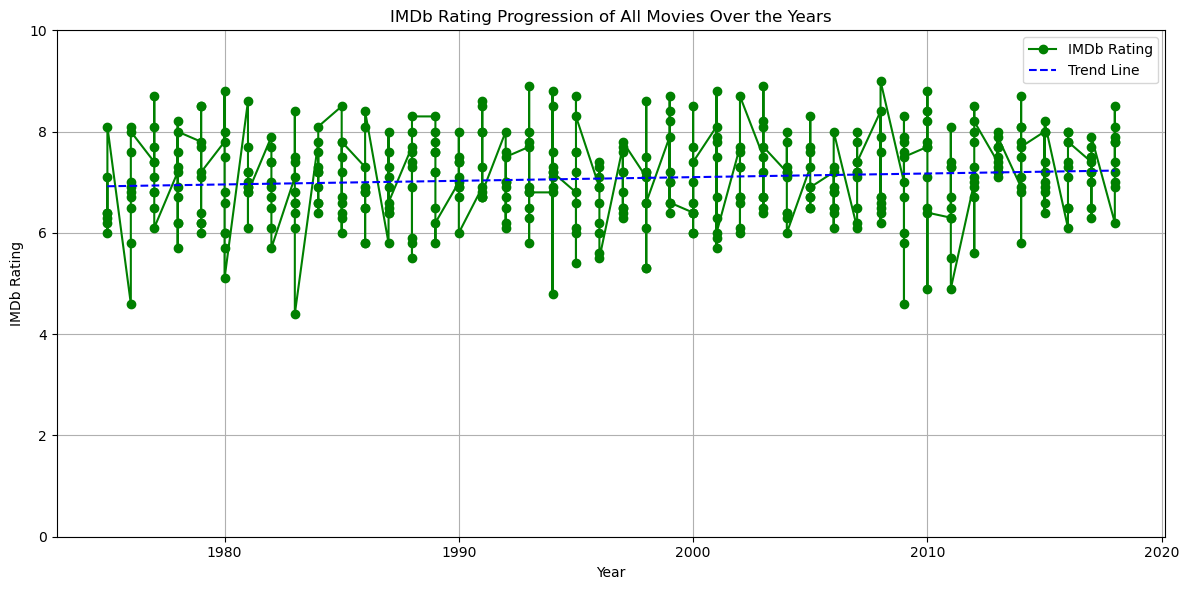

In [9]:

# Combine IMDb rating data for all movies
all_movies_df = pd.concat([non_animated_df, animated_df])

# Remove any rows with missing IMDb ratings
all_movies_df = all_movies_df.dropna(subset=['imdb_rating'])

# Sort DataFrame by year
all_movies_df = all_movies_df.sort_values(by='year')

# Fit a linear trend line
z = np.polyfit(all_movies_df['year'], all_movies_df['imdb_rating'], 1)
p = np.poly1d(z)

# Plot IMDb rating progression for all movies
plt.figure(figsize=(12, 6))
plt.plot(all_movies_df['year'], all_movies_df['imdb_rating'], marker='o', linestyle='-', color='green', label='IMDb Rating')
plt.plot(all_movies_df['year'], p(all_movies_df['year']), color='blue', linestyle='--', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating Progression of All Movies Over the Years')
plt.grid(True)  # Add grid lines for better readability
plt.ylim(0, 10)  # Set y-axis limit for IMDb rating
plt.legend()  # Show legend
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

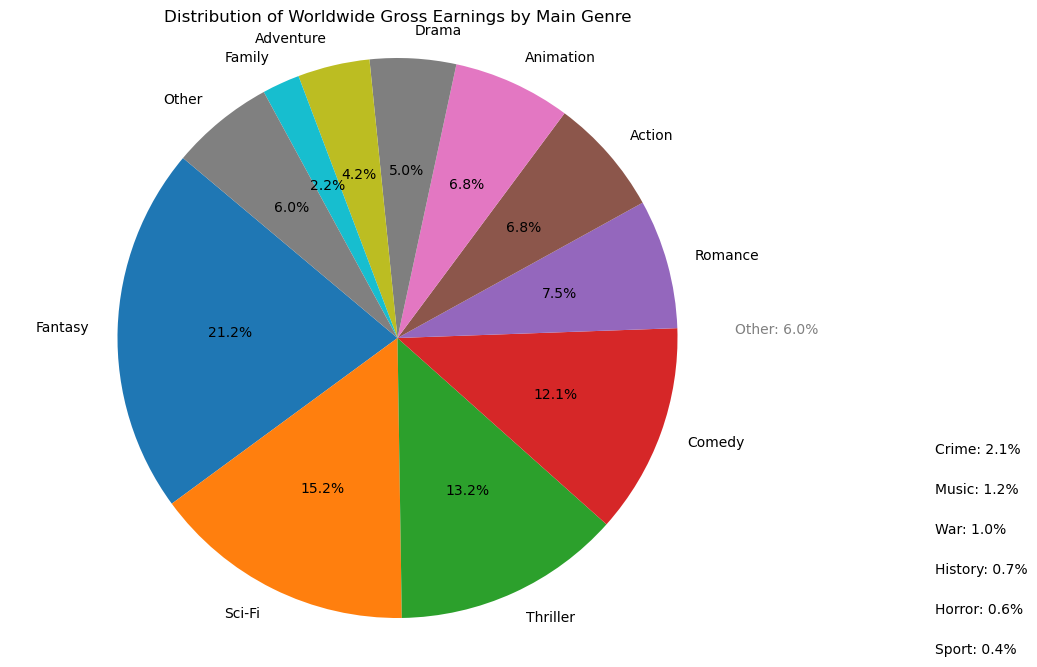

In [10]:
# Clean the 'worldwide_gross' column
df['worldwide_gross'] = df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by main genre and sum the worldwide gross earnings for each genre
genre_grouped = df.groupby('Main_Genre')['worldwide_gross'].sum()

# Sort the genres by total worldwide gross earnings
genre_grouped = genre_grouped.sort_values(ascending=False)

# Get top 10 genres
top_10_genres = genre_grouped.head(10)
other_genres = genre_grouped[10:]

# Create a new series with top 10 genres and "Other"
combined_genres = top_10_genres.copy()
combined_genres['Other'] = other_genres.sum()

# Plotting
plt.figure(figsize=(10, 8))
# Define colors for the pie chart
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'gray']
# Plot pie chart with top 10 genres and "Other"
plt.pie(combined_genres, labels=combined_genres.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1, colors=colors)
plt.title('Distribution of Worldwide Gross Earnings by Main Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display percentages of "Other" off to the side
plt.gcf().text(0.85, 0.5, f'Other: {other_genres.sum() / genre_grouped.sum() * 100:.1f}%', fontsize=10, color='gray')

# Label leftover genres and their percentages off to the side
other_percentage = other_genres / genre_grouped.sum() * 100
for i, (genre, percentage) in enumerate(other_percentage.items(), 1):
    plt.gcf().text(1.05, 0.4 - 0.05 * i, f'{genre}: {percentage:.1f}%', fontsize=10)

plt.show()

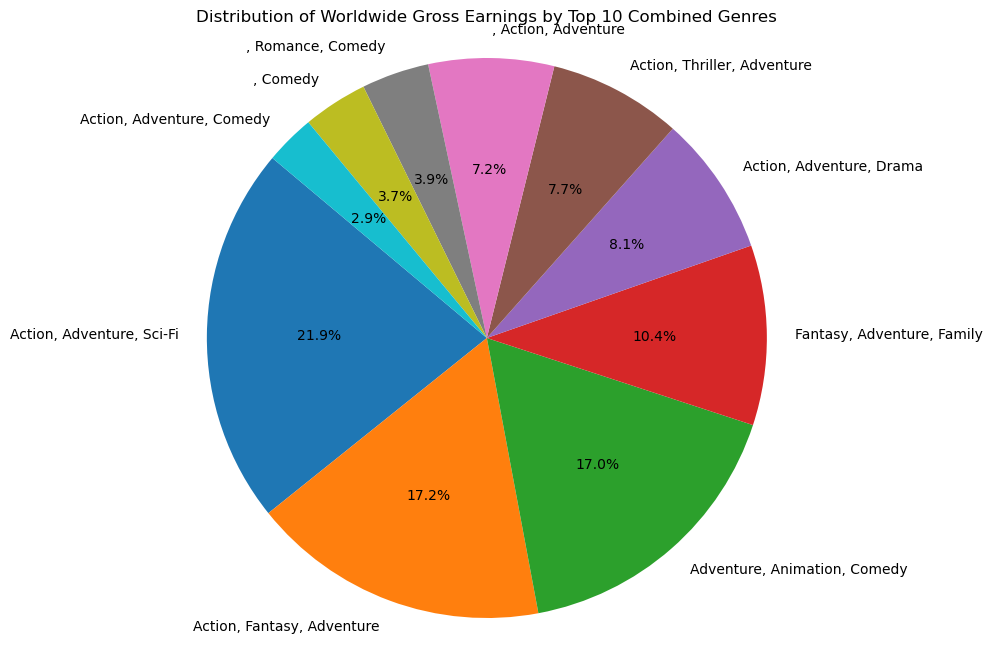

In [11]:
# Fill missing values in 'Main_Genre', 'Genre_2', and 'Genre_3' columns with empty strings
df[['Main_Genre', 'Genre_2', 'Genre_3']] = df[['Main_Genre', 'Genre_2', 'Genre_3']].fillna('')

# Concatenate Main_Genre, Genre_2, and Genre_3 into a single series, avoiding duplicates
combined_genres = df.apply(lambda row: ', '.join(set(row[['Main_Genre', 'Genre_2', 'Genre_3']])), axis=1)

# Group the combined genres by their counts
genre_counts = combined_genres.value_counts()

# Select the top 10 genres by count
top_10_genres = genre_counts.head(10).index

# Filter the DataFrame to include only rows with the top 10 genres
df_top_10_genres = df[combined_genres.isin(top_10_genres)]

# Group the data by genre and sum the worldwide gross earnings for each genre
genre_grouped = df_top_10_genres.groupby(combined_genres)['worldwide_gross'].sum()

# Sort the genres by total worldwide gross earnings
genre_grouped = genre_grouped.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.pie(genre_grouped, labels=genre_grouped.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1)
plt.title('Distribution of Worldwide Gross Earnings by Top 10 Combined Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

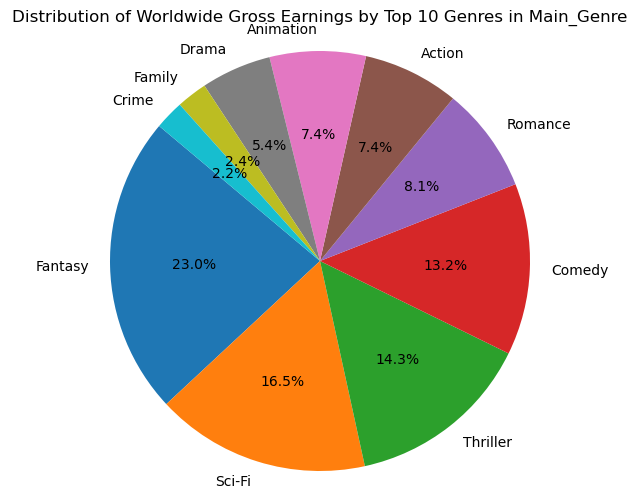

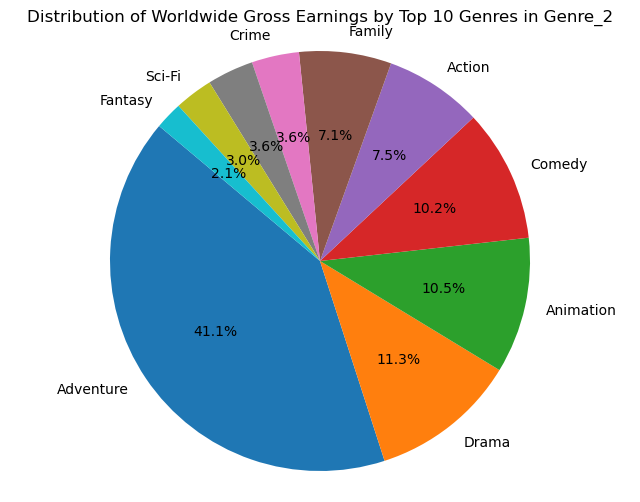

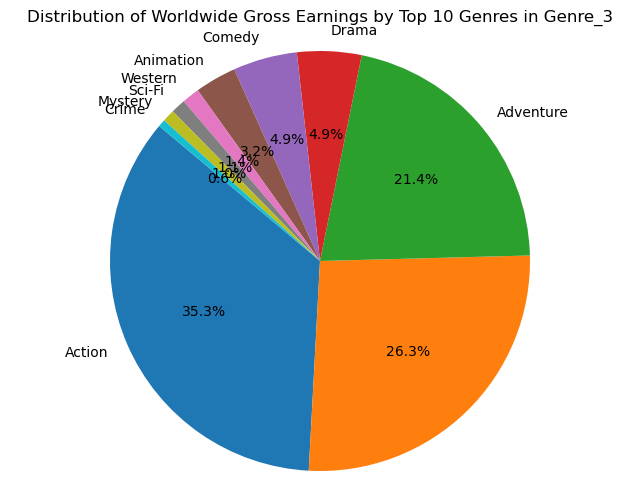

In [12]:
# Function to create pie chart for a specific genre column
def create_pie_chart_for_genre_column(genre_column):
    # Fill missing values in the genre column with empty strings
    df[genre_column] = df[genre_column].fillna('')
    
    # Get the top 10 genres in the specified column
    top_10_genres = df[genre_column].value_counts().head(10).index
    
    # Filter the DataFrame to include only rows with the top 10 genres in the specified column
    df_top_10_genres = df[df[genre_column].isin(top_10_genres)]
    
    # Group the data by genre and sum the worldwide gross earnings for each genre
    genre_grouped = df_top_10_genres.groupby(genre_column)['worldwide_gross'].sum()
    
    # Sort the genres by total worldwide gross earnings
    genre_grouped = genre_grouped.sort_values(ascending=False)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(genre_grouped, labels=genre_grouped.index, autopct='%1.1f%%', startangle=140, labeldistance=1.1)
    plt.title(f'Distribution of Worldwide Gross Earnings by Top 10 Genres in {genre_column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Create pie charts for each genre column
create_pie_chart_for_genre_column('Main_Genre')
create_pie_chart_for_genre_column('Genre_2')
create_pie_chart_for_genre_column('Genre_3')

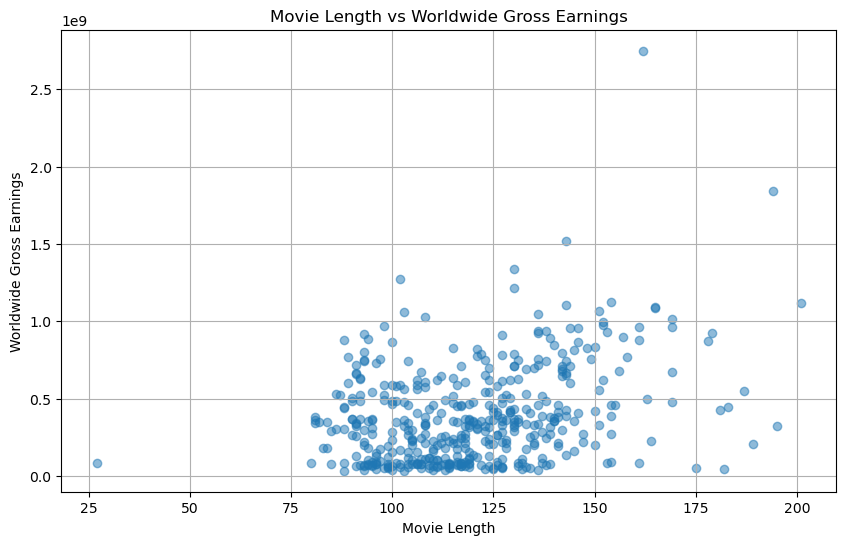

In [13]:
# Convert 'length' column to numeric
df['length'] = pd.to_numeric(df['length'], errors='coerce')

# Remove rows with missing values in 'length' or 'worldwide_gross' columns
df_cleaned = df.dropna(subset=['length', 'worldwide_gross'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['length'], df_cleaned['worldwide_gross'], alpha=0.5)
plt.xlabel('Movie Length')
plt.ylabel('Worldwide Gross Earnings')
plt.title('Movie Length vs Worldwide Gross Earnings')
plt.grid(True)
plt.show()

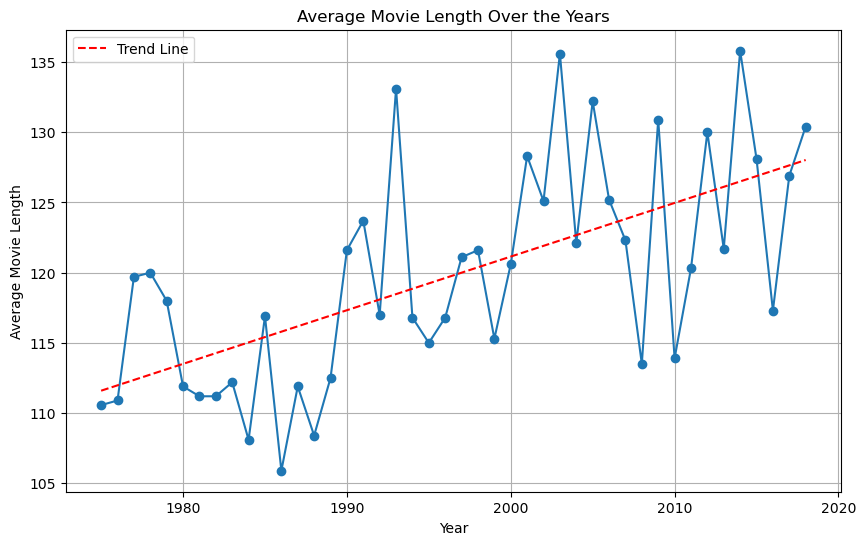

In [14]:
# Group the data by year and calculate the average length of movies for each year
avg_length_per_year = df.groupby('year')['length'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(avg_length_per_year.index, avg_length_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Movie Length')
plt.title('Average Movie Length Over the Years')
plt.grid(True)

# Add trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_length_per_year.index, avg_length_per_year.values)
trend_line = slope * avg_length_per_year.index + intercept
plt.plot(avg_length_per_year.index, trend_line, color='red', linestyle='--', label='Trend Line')
plt.legend()

plt.show()